In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
# Load the data
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### EDA

In [4]:
# Load the data into a DataFrame
iris_df = pd.DataFrame(columns=iris.feature_names, data=iris.data)
iris_df['class'] = iris.target

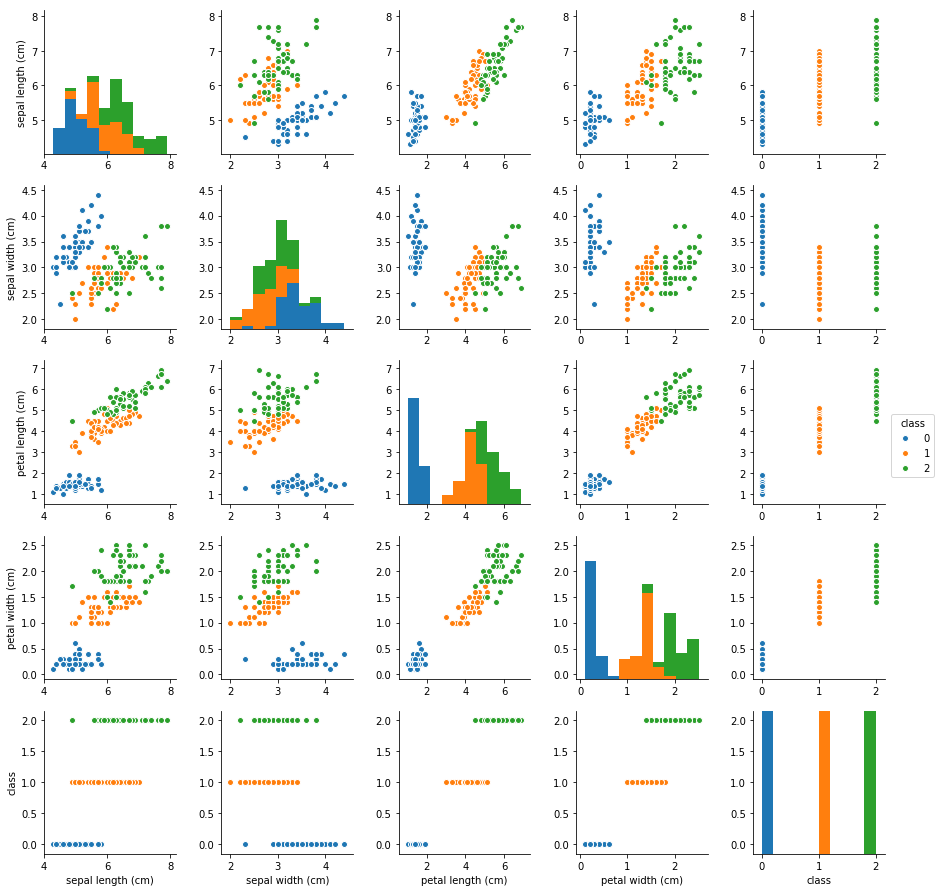

In [5]:
# Relationship between features
sns.pairplot(iris_df, hue='class')

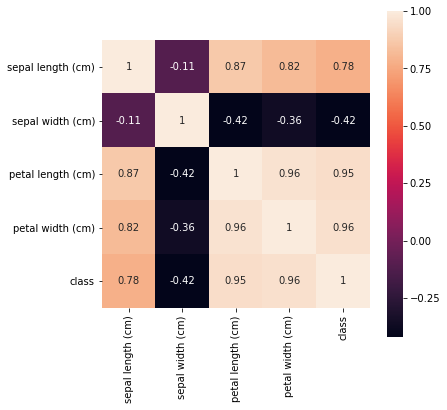

In [6]:
# Correlation between features
cm = np.corrcoef(iris_df.values.T)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(cm, cbar=True, annot=True, square=True, 
            yticklabels=iris_df.columns, xticklabels=iris_df.columns, ax=ax)

### Logistic Regresssion

In [26]:
X = np.log1p(iris.data) # Apply log transformation to normalize the data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegressionCV()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [27]:
# Evaluation
print('C regularization:', [(cls, c) for cls, c in zip(lr.classes_, lr.C_)])
print('Accuracy train, test:', lr.score(X_train, y_train), lr.score(X_test, y_test))
print('Classification report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

C regularization: [(0, 0.35938136638046259), (1, 166.81005372000558), (2, 10000.0)]
Accuracy train, test: 0.990476190476 0.977777777778
Classification report:
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.94      0.97        18
  virginica       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



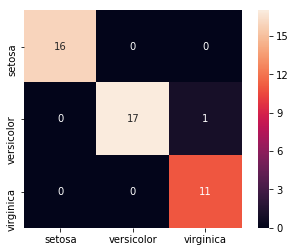

In [35]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, square=True, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)

### Logistic Regression (OneVsRest) + ROC Curve

In [13]:
X = iris.data
y = label_binarize(iris.target, classes=[0, 1, 2]) # Target variable needs to be binarized in order to plot 
                                                   # ROC curves by class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegressionCV()
cf = OneVsRestClassifier(lr)
cf.fit(X_train, y_train)
y_pred = cf.predict(X_test)
y_score = cf.decision_function(X_test)

In [14]:
# Evaluation
print('C regularization:', [(cls, est.C_) for cls, est in zip(cf.classes_, cf.estimators_)])
print('Accuracy train, test:', cf.score(X_train, y_train), cf.score(X_test, y_test))
print('Classification report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

C regularization: [(0, array([ 0.04641589])), (1, array([ 21.5443469])), (2, array([ 166.81005372]))]
Accuracy train, test: 0.742857142857 0.666666666667
Classification report:
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       0.75      0.33      0.46        18
  virginica       0.92      1.00      0.96        11

avg / total       0.88      0.73      0.77        45



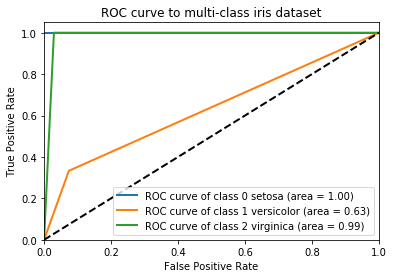

In [15]:
# ROC curve & auc
plt.figure()
for i, name in enumerate(iris.target_names):
    fpr, tpr, _ = roc_curve(y_test[:,i], y_pred[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2,
             label='ROC curve of class {0} {1} (area = {2:0.2f})'''.format(i, name, roc_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve to multi-class iris dataset')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [40]:
X = iris.data # It is not necessary to apply log transformation to normalize the data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [49]:
# Evaluation
feat_imp = sorted(((cls, imp) for cls, imp in zip(iris.feature_names, dt.feature_importances_)), 
                  key=lambda i: i[1], reverse=True)
print('Feature importance:', feat_imp)
print('Accuracy train, test:', dt.score(X_train, y_train), dt.score(X_test, y_test))
print('Classification report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Feature importance: [('petal length (cm)', 0.89367339035633442), ('petal width (cm)', 0.084821967371683099), ('sepal width (cm)', 0.021504642271982524), ('sepal length (cm)', 0.0)]
Accuracy train, test: 1.0 0.977777777778
Classification report:
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.94      0.97        18
  virginica       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



### Random Forests

In [53]:
X = iris.data # It is not necessary to apply log transformation to normalize the data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [54]:
# Evaluation
feat_imp = sorted(((cls, imp) for cls, imp in zip(iris.feature_names, rf.feature_importances_)), 
                  key=lambda i: i[1], reverse=True)
print('Feature importance:', feat_imp)
print('Accuracy train, test:', dt.score(X_train, y_train), dt.score(X_test, y_test))
print('Classification report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Feature importance: [('petal width (cm)', 0.49664554580808895), ('petal length (cm)', 0.36930855949067981), ('sepal length (cm)', 0.11524598241715982), ('sepal width (cm)', 0.018799912284071477)]
Accuracy train, test: 1.0 0.977777777778
Classification report:
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.94      0.97        18
  virginica       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45

